### `ROC-AUC Curve for Binary Classification`

In [45]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [46]:
# generate two class dataset
X, y = make_classification(n_samples=1000,n_classes=2,n_features=20,random_state=27)

In [47]:
# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [48]:
# import models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# Logistic Regression
model1 = LogisticRegression()

# K Nearest Neighbour
model2 = KNeighborsClassifier(n_neighbors=4)

In [50]:
# fit model

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [51]:
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [52]:
from sklearn.metrics import roc_curve

# Sklearn has a very potent method, roc_curve(), which computes the ROC for your classifier in a matter of seconds! It returns the FPR, TPR, and threshold values.

In [53]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [54]:
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9762374461979914 0.9233769727403157


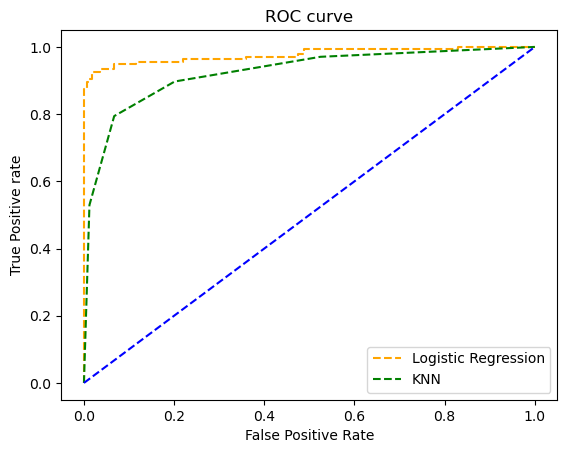

In [55]:

# matplotlib
import matplotlib.pyplot as plt


# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### `AUC-ROC Curve for Multi-Class Classification`(Optional)

In [56]:
#The AUC-ROC curve is only for binary classification problems. But we can extend it to multiclass classification problems using the One vs. All technique.

#So, if we have three classes, 0, 1, and 2, the ROC for class 0 will be generated as classifying 0 against not 0, i.e., 1 and 2. The ROC for class 1 will be generated as classifying 1 against not 1, and so on.

#The ROC curve for multi-class classification models can be determined as below:

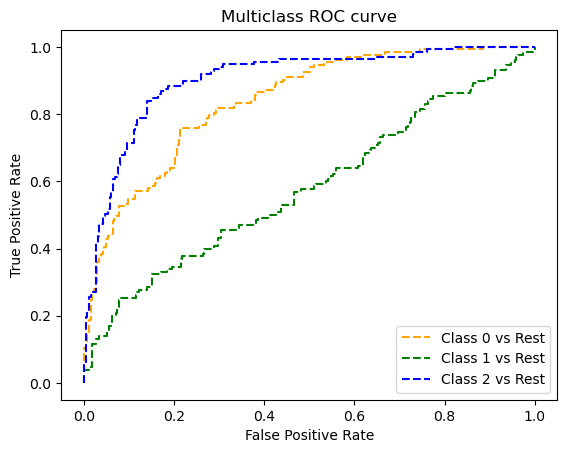

Accuracy: [0.755, 0.7, 0.8425]
Specificity: [0.8202247191011236, 0.9148148148148149, 0.8821292775665399]
Sensitivity: [0.6240601503759399, 0.25384615384615383, 0.7664233576642335]
AUC: [0.8394581960519275, 0.5797150997150997, 0.903194471427382]


In [71]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

# generate 3 class dataset
X, y = make_classification(n_samples=1000, n_classes=3, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred_prob = clf.predict_proba(X_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# roc curve for classes
fpr = {}
tpr = {}
thresh = {}
n_class = 3
score = []
auc = []

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_bin[:, i], pred_prob[:, i])
    score.append(roc_auc_score(y_test_bin[:, i], pred_prob[:, i]))
    auc.append(score[i])

# Calculate accuracy, specificity, and sensitivity
accuracy = []
specificity = []
sensitivity = []

for i in range(n_class):
    tn = len(np.where((y_test_bin[:, i] == 0) & (pred_prob[:, i] < 0.5))[0])
    fp = len(np.where((y_test_bin[:, i] == 0) & (pred_prob[:, i] >= 0.5))[0])
    fn = len(np.where((y_test_bin[:, i] == 1) & (pred_prob[:, i] < 0.5))[0])
    tp = len(np.where((y_test_bin[:, i] == 1) & (pred_prob[:, i] >= 0.5))[0])
    
    accuracy.append((tp + tn) / (tp + tn + fp + fn))
    specificity.append(tn / (tn + fp))
    sensitivity.append(tp / (tp + fn))

# plotting
colors = ['orange', 'green', 'blue']
labels = ['Class 0 vs Rest', 'Class 1 vs Rest', 'Class 2 vs Rest']

plt.figure()
for i in range(n_class):
    plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=labels[i])

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC', dpi=300)
plt.show()

print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)
print("AUC:", auc)
